## Pip install opencv-python

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [81]:
## Reading an image uisng the cv2.imread()
img = cv2.imread(r"C:\\Users\\hari.koduru\\Downloads\\OpenCV\\shapes.jpg")
print("Image Shape:", img.shape)    ## height, width, channels
print("Image Data Type:", img.dtype)   ## uint8 --> 0 to 255

## the current image is in BGR format


Image Shape: (980, 980, 3)
Image Data Type: uint8


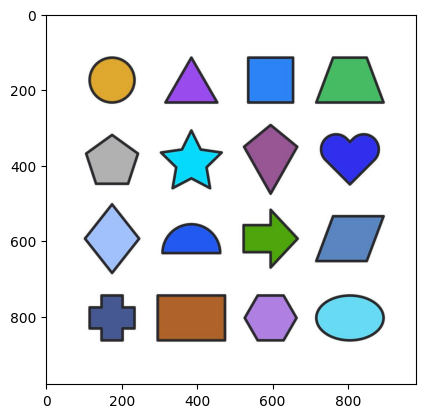

In [82]:
## displaying the image using matplotlib
plt.imshow(img)
plt.show()

In [83]:
## displaying an image using cv2.imshow()
cv2.imshow("images display window", img)
cv2.waitKey(0)  ## waits until a key is pressed
cv2.destroyAllWindows()

In [12]:
## saving the image using cv2.imwrite() after converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("shapes_copy.jpg", gray)

True

In [13]:
print(gray.shape)  ## height, width
print(gray.dtype)  ## uint8 --> 0 to 255
print("-------------------")
print(gray)

(980, 980)
uint8
-------------------
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


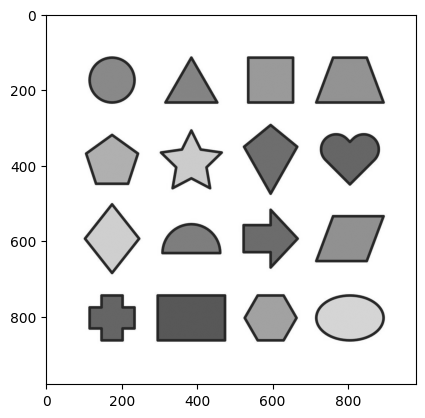

In [14]:
## Displaying the image using matplotlib
plt.imshow(gray, cmap='gray')
plt.show()

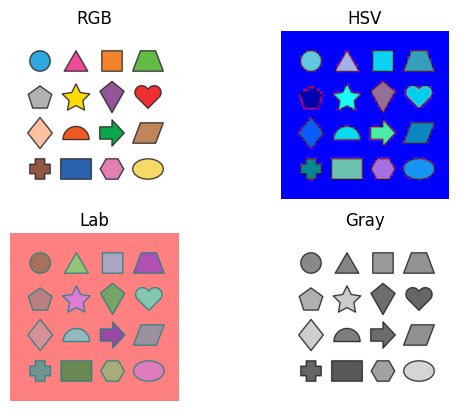

In [15]:
## convert to diff color spaces using cv2.cvtColor()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  ## BGR to RGB
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  ## BGR to HSV
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)  ## BGR to Lab
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  ## BGR to Gray

## displaying the converted images using matplotlib
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_hsv)
plt.title("HSV")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(img_lab)
plt.title("Lab")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(img_gray, cmap='gray')
plt.title("Gray")
plt.axis("off")
plt.show()

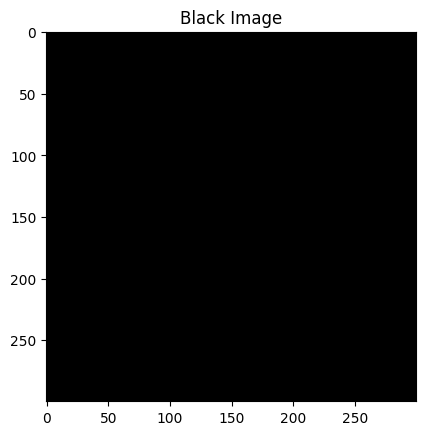

In [16]:
black_image = np.zeros((300, 300, 3), dtype="uint8")
plt.imshow(black_image)
plt.title("Black Image")
plt.show()

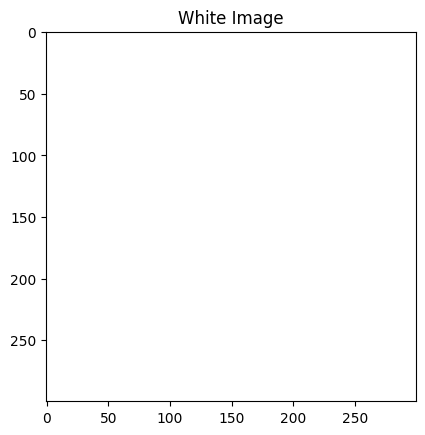

In [17]:
white_image = np.ones((300, 300, 3), dtype="uint8") * 255
## if we dont multiply by 255 we will get a gray image
## here the default is BGR so we have to multiply by 255
plt.imshow(white_image)
plt.title("White Image")
plt.show()

### image resizing, scaling and intrepolation

Original Image Shape: (178, 282, 3)


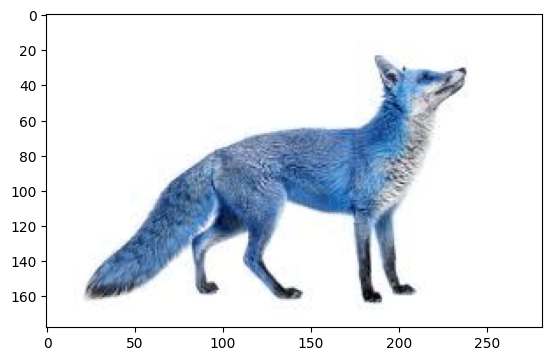

In [18]:
## Reading an new image and then resizing and rescaling with several interpolations
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\fox.jpg")
print("Original Image Shape:", img.shape)
plt.imshow(img)
plt.show()

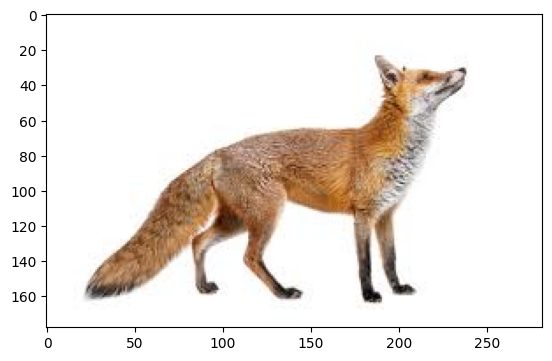

In [19]:
## see the maplotlib expect RGB image but opencv read BGR image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  ## converting BGR to RGB
plt.imshow(img_rgb)
plt.show()

Resized Image Shape: (200, 200, 3)


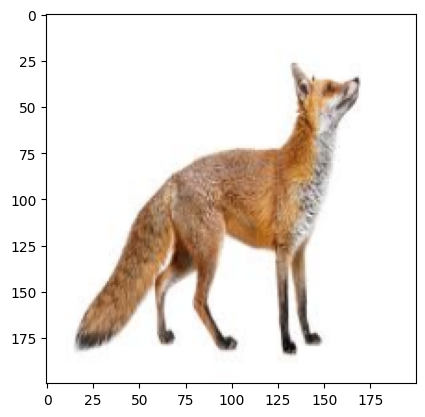

In [20]:
## resizing the image to a specific size (200, 200) using INTER_LINEAR interpolation
resized_image = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LINEAR)
print("Resized Image Shape:", resized_image.shape)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Interpolation Methods
1. cv2.INTER_NEAREST - Nearest Neighbor Interpolation
2. cv2.INTER_LINEAR - Bilinear Interpolation (default)
3. cv2.INTER_CUBIC - Bicubic Interpolation
4. cv2.INTER_LANCZOS4 - Lanczos Interpolation
5. cv2.INTER_AREA - Area Interpolation

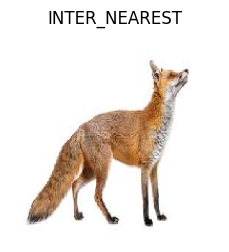

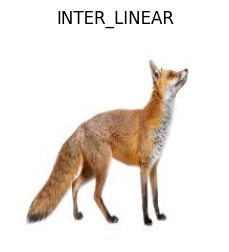

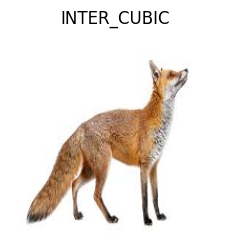

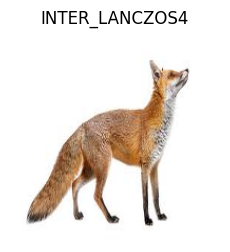

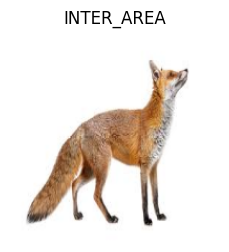

In [21]:
## using different interpolation methods
## The most used one is INTER_LINEAR which is the default one
## For better results in enlarging use INTER_LANCZOS4
interpolations = {
    "INTER_NEAREST": cv2.INTER_NEAREST,
    "INTER_LINEAR": cv2.INTER_LINEAR,
    "INTER_CUBIC": cv2.INTER_CUBIC,
    "INTER_LANCZOS4": cv2.INTER_LANCZOS4,
    "INTER_AREA": cv2.INTER_AREA
}

for i, method in enumerate(interpolations.values()):
    resized_image = cv2.resize(img, (200, 200), interpolation=method)
    plt.figure(figsize=(10,6))
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))   ## converting BGR to RGB for displaying
    plt.title(list(interpolations.keys())[i])
    plt.axis('off')
    plt.show()

### The above is improper resizing to preserve the aspect ratio we can go for rescaling.
### Aspect Ratio = width / height

(225, 225, 3)
Image Height: 225
Image Width: 225
Aspect Ratio: 1.0


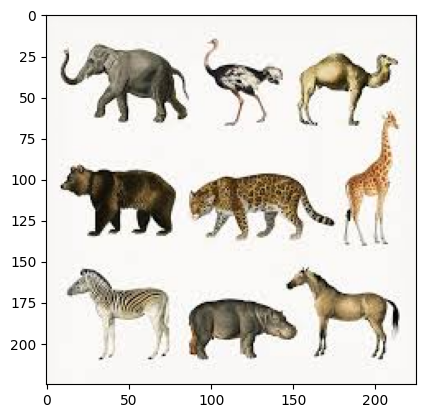

In [22]:
img = cv2.imread(r"C:\\Users\\hari.koduru\\Downloads\\OpenCV\\all_animals.jpg")
print(img.shape)
img_h, img_w = img.shape[:2]
print("Image Height:", img_h)
print("Image Width:", img_w)
aspect_ratio = img_w / img_h
print("Aspect Ratio:", aspect_ratio)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Rescaled Image Shape: (338, 338, 3)


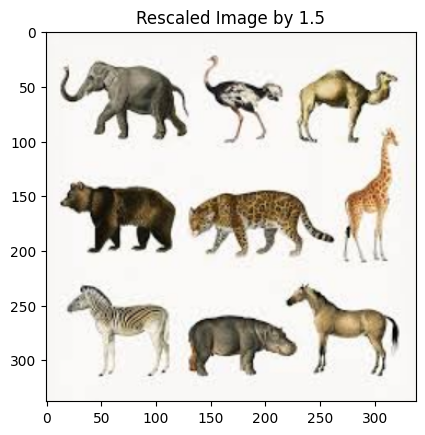

In [23]:
## rescaling the image by a factor of 1.5
rescaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
print("Rescaled Image Shape:", rescaled_img.shape)
plt.imshow(cv2.cvtColor(rescaled_img, cv2.COLOR_BGR2RGB))
plt.title("Rescaled Image by 1.5")
plt.show()

## 1.5 * 225 = 337.5 --> 338

### Understanding the coordinates system in images
### The origin (0,0) is at the top-left corner
### x-axis extends to the right --> width (w)
### y-axis extends downwards --> height (h)

### Flipping, Rotating and Cropping an image

Original Image Shape: (178, 282, 3)


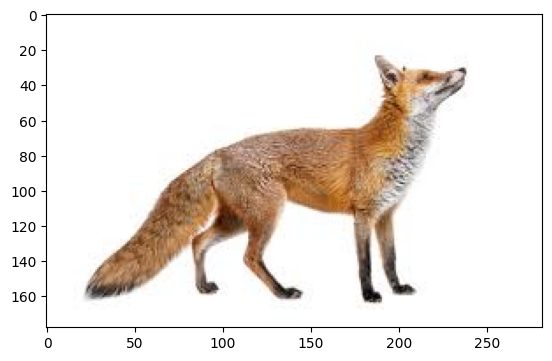

In [24]:
## flipping, rotating and cropping an image
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\fox.jpg")
print("Original Image Shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

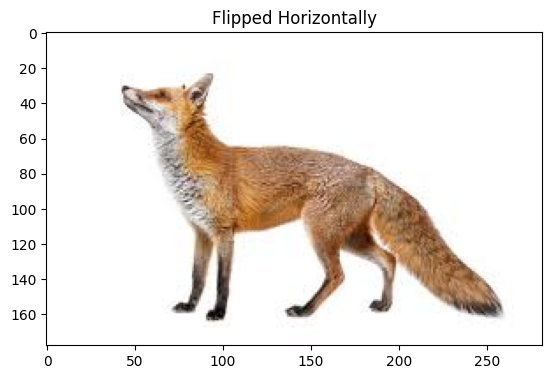

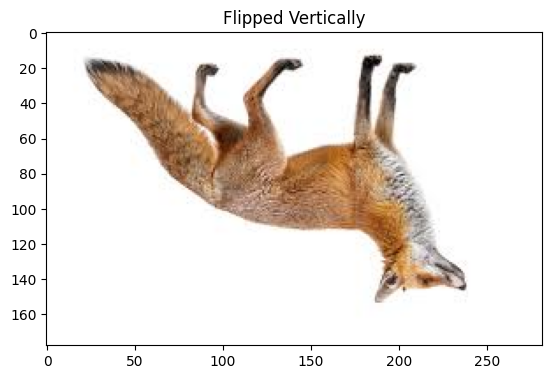

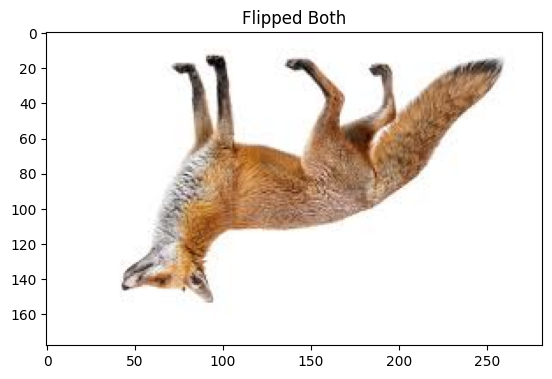

In [25]:
## Flipping the image
flipped_horizontally = cv2.flip(img, 1)  ## flip around y-axis
flipped_vertically = cv2.flip(img, 0)    ## flip around x-axis
flipped_both = cv2.flip(img, -1)        ## flip around both axes

plt.imshow(cv2.cvtColor(flipped_horizontally, cv2.COLOR_BGR2RGB))
plt.title("Flipped Horizontally")
plt.show()

plt.imshow(cv2.cvtColor(flipped_vertically, cv2.COLOR_BGR2RGB))
plt.title("Flipped Vertically")
plt.show()

plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB))
plt.title("Flipped Both")
plt.show()

Original Image Shape: (225, 225, 3)


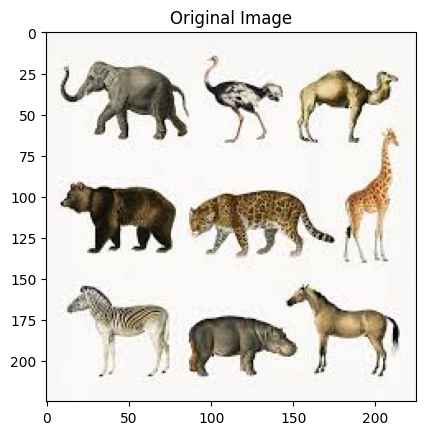

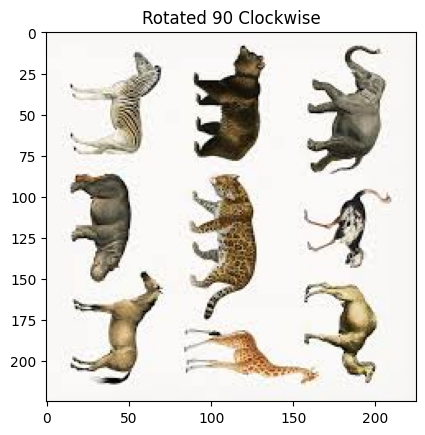

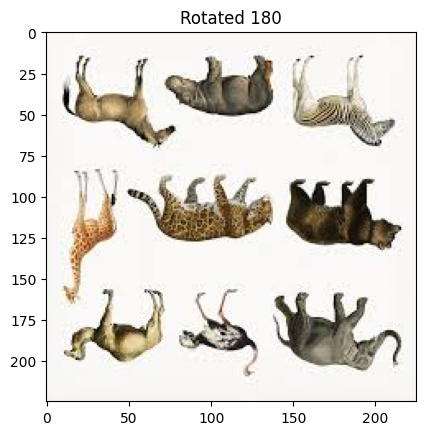

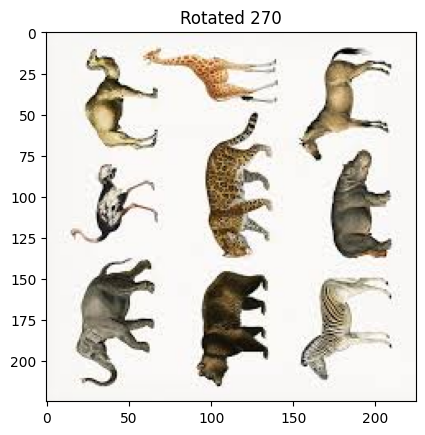

In [26]:
## rotate an img using the cv2.rotate()
original_img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\all_animals.jpg")
print("Original Image Shape:", original_img.shape)
rotate_90_clockwise = cv2.rotate(original_img, cv2.ROTATE_90_CLOCKWISE)
rotate_180 = cv2.rotate(original_img, cv2.ROTATE_180)
rotate_270 = cv2.rotate(original_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

plt.imshow(cv2.cvtColor(rotate_90_clockwise, cv2.COLOR_BGR2RGB))
plt.title("Rotated 90 Clockwise")
plt.show()

plt.imshow(cv2.cvtColor(rotate_180, cv2.COLOR_BGR2RGB))
plt.title("Rotated 180")
plt.show()

plt.imshow(cv2.cvtColor(rotate_270, cv2.COLOR_BGR2RGB))
plt.title("Rotated 270")
plt.show()


Original Image Shape: (980, 980, 3)


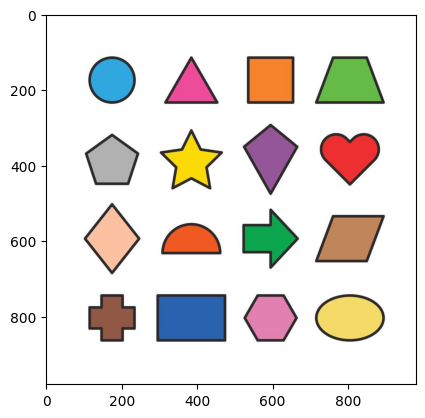

In [27]:
## cropping an image using the cv2.crop()
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\shapes.jpg")
print("Original Image Shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Original Image Shape: (980, 980, 3)
Cropped Image Shape: (230, 200, 3)


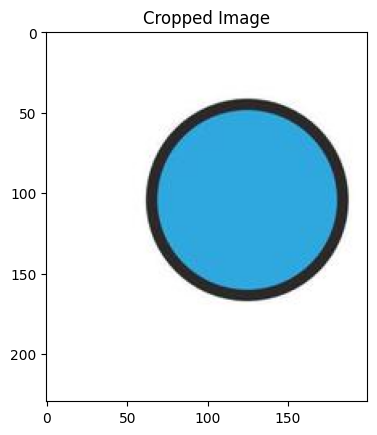

In [28]:
 ## cropping the image x axis is width(w) and y axis is height(h)
print("Original Image Shape:", img.shape)
x1, y1 = 50, 70     ## crop from (50, 70) --> 50 is width and 70 is height
x2, y2 = 250, 300    ## crop to (250, 300) --> 250 is width and 300 is height
cropped_img = img[y1:y2, x1:x2]   ## note the order is img[height, width]
print("Cropped Image Shape:", cropped_img.shape)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.show()

#### Drawing lines shapes and text on the images

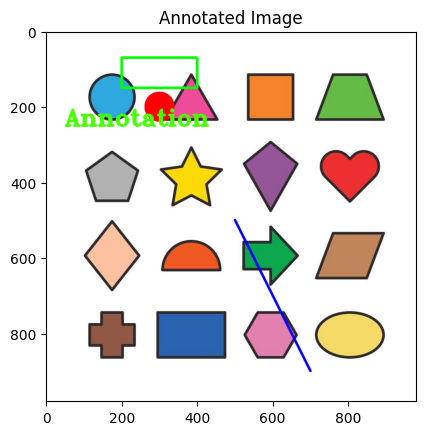

In [29]:
## image annotations using cv2.line(), cv2.rectangle(), cv2.circle() and cv2.putText()
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\shapes.jpg")
annotated_img = img.copy()

## Drawing a line
line = cv2.line(annotated_img, (500, 500), (700, 900), (255, 0, 0), 5)  ## colors is B G R and thickness is 2

## Drawing a rectangle
rectangle = cv2.rectangle(annotated_img, (200, 70), (400, 150), (0, 255, 0), 5)

## Drawing a circle
circle = cv2.circle(annotated_img, (300, 200), 40, (0, 0, 255), -1)  ## -1 thickness means filled circle

## Putting text on the image
text = cv2.putText(annotated_img, "Annotation", (50, 250), cv2.FONT_HERSHEY_TRIPLEX, 2, (0, 255, 70), 5)

## Displaying the annotated image
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image")
plt.show()

### Affine Transformations

### Filters 

Original Image Shape: (149, 338, 3)


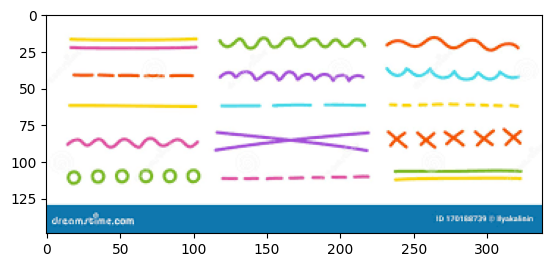

In [30]:
## appying filetrs on top of the images
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\lines.png")
print("Original Image Shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

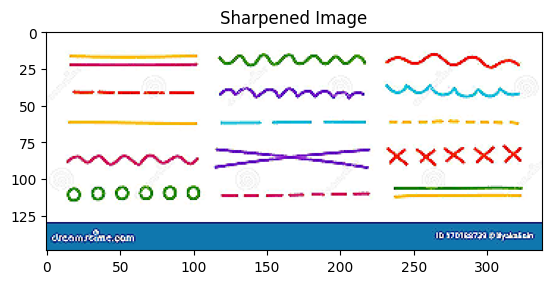

In [31]:
## Applying a custom sharpening filter using cv2.filter2D()
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')    
plt.show()

In [32]:
## everytimewe run this we will get a different random number
import random 
random_number = random.randint(1, 100)
print("Random Number between 1 and 100:", random_number)


Random Number between 1 and 100: 4


In [33]:
## to get the same random number everytime we run the code
import random
random.seed(42)
random.randint(1,10)

2

### Blurring is a teachnique which reduces the sharp transitions in an image by averaging pixel values in a local neighbourhood.

Original Image shape: (225, 225, 3)


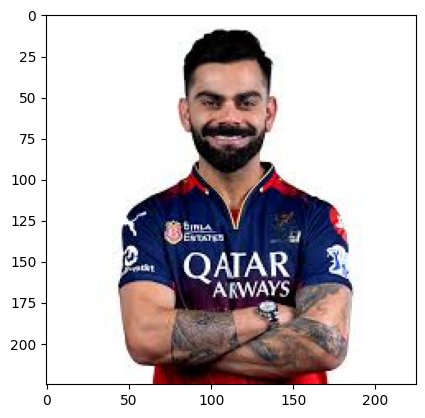

In [34]:
## Applying blur filters to images
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\virat.jpg")
print("Original Image shape:",img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

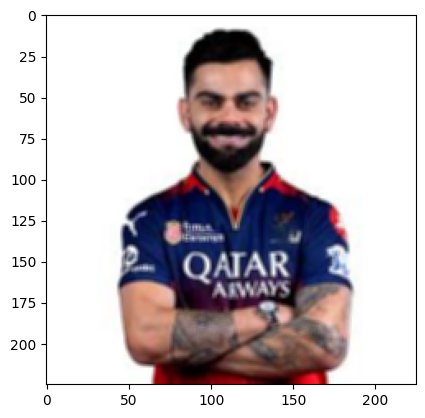

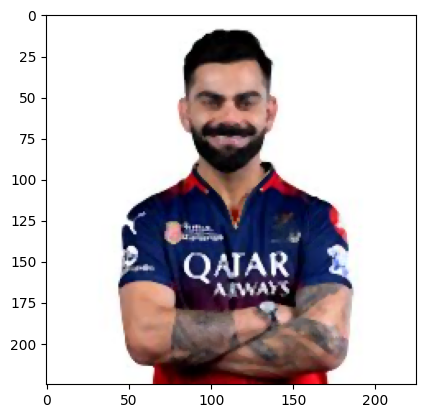

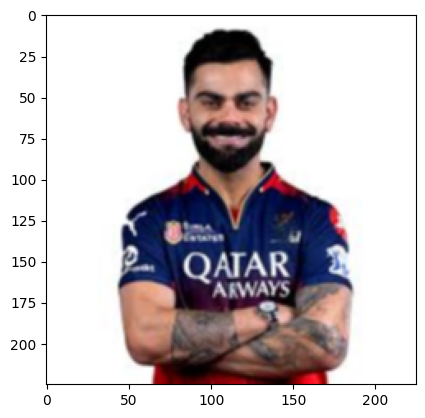

In [36]:
## applying the avrage blur
average_blur = cv2.blur(img, (3,3))
plt.imshow(cv2.cvtColor(average_blur, cv2.COLOR_BGR2RGB))
plt.show()

## applying median blur
median_blur = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.show()

## applying gaussian blur
gaussian_blur = cv2.GaussianBlur(img, (3,3), 0)  ## 3 is the kernel size and 0 is the standard deviation
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.show()

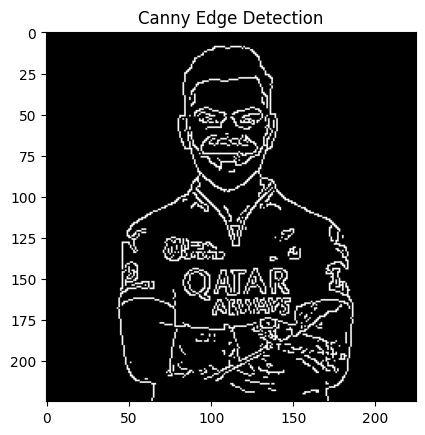

In [ ]:
## detecting edges using Canny edge detector
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   ## we have to use the gray scale image for edge detection
edges = cv2.Canny(img_gray, 80, 230)  ## 80 and 230 are the threshold values
## pixels with <80 are discarded and pixels with 230 are accepted as strong edges
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

Blue Channel Shape: (980, 980)


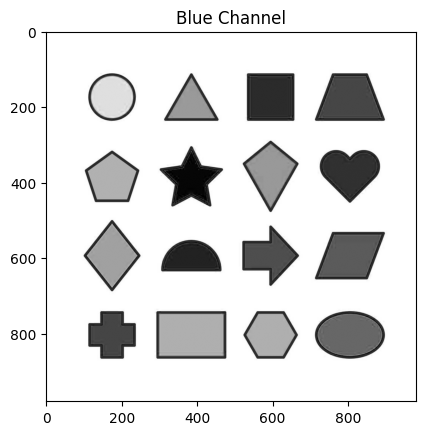

Green Channel Shape: (980, 980)


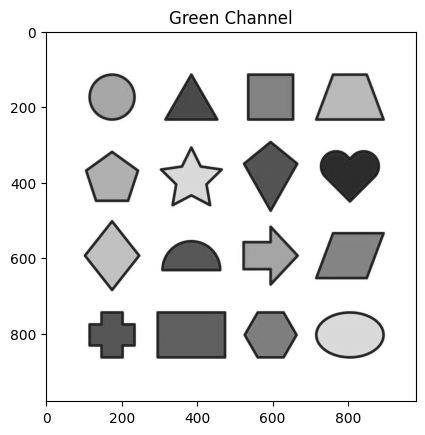

Red Channel Shape: (980, 980)


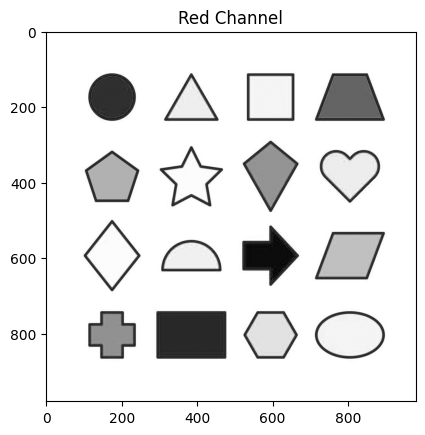

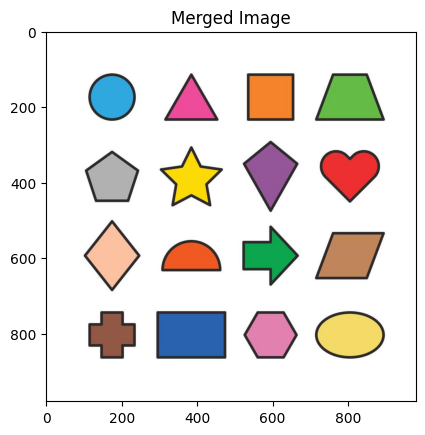

In [ ]:
## spliting and merging channels of an image
## cv2.split() and cv2.merge()
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\shapes.jpg")
b_channel, g_channel, r_channel = cv2.split(img)
print("Blue Channel Shape:", b_channel.shape)
plt.imshow(b_channel, cmap='gray')
plt.title("Blue Channel")
plt.show()

print("Green Channel Shape:", g_channel.shape)
plt.imshow(g_channel, cmap='gray')
plt.title("Green Channel")
plt.show()

print("Red Channel Shape:", r_channel.shape)
plt.imshow(r_channel, cmap='gray')
plt.title("Red Channel")
plt.show()

## see how the channels are merged back to form the original image
merged_img = cv2.merge((r_channel, g_channel, b_channel))
plt.imshow(merged_img)    ## see how i merged the channels in RGB order
plt.title("Merged Image")
plt.show()

## Plotting image as a histogram to see the range of values

(400, 800)


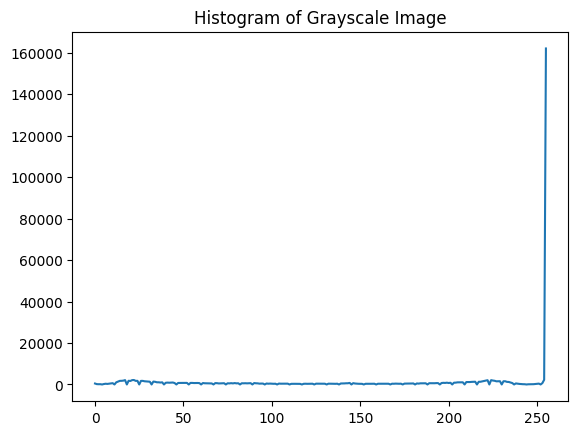

In [96]:
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\flowers.webp", cv2.IMREAD_GRAYSCALE)
print(img.shape)
hist, bins = np.histogram(img.flatten(), 256, [0,256])
plt.plot(hist)
plt.title("Histogram of Grayscale Image")   
plt.show()

### Histogram equalization is a contrast enhancement technique.
### It improves the visibility of details in an image by redistributing the pixel intensities so that they can span the full range. 

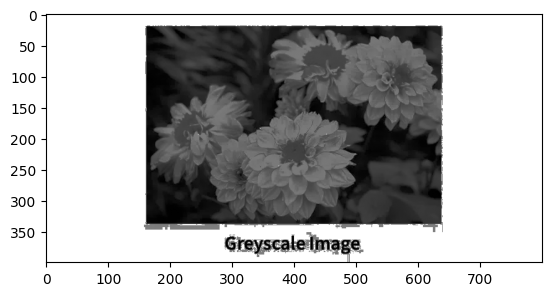

In [99]:
## Histogram Equalization using cv2.equalizeHist()
equalized_img = cv2.equalizeHist(img)
plt.imshow(equalized_img, cmap='gray')
plt.show()


### Note: Histogram equalize is good when the histogram of the image is confined to a particular region. It wont work good in places where there is large intensity variations where histogram covers a large region i.e. both bright and dark pixels are present.

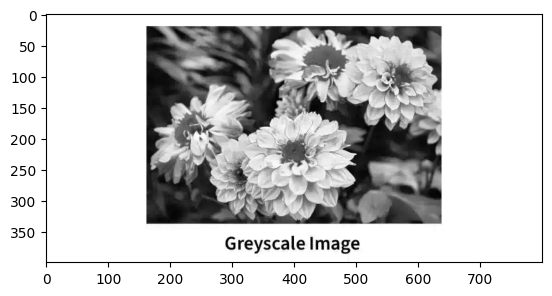

In [100]:
## CLAHE --> Contrast Limited Adaptive Histogram Equalization
clahe_img = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl1 = clahe_img.apply(img)
plt.imshow(cv2.cvtColor(cl1,cv2.COLOR_GRAY2RGB))
plt.show()

### Thresholding --> Thresholding is an image processing technique that creates a binary image by separating the image pixels into 2 groups foreground and background and the values are 0 and 1 (0 --> balck) and (1 --> white)

[255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 255   0   0   0 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255]


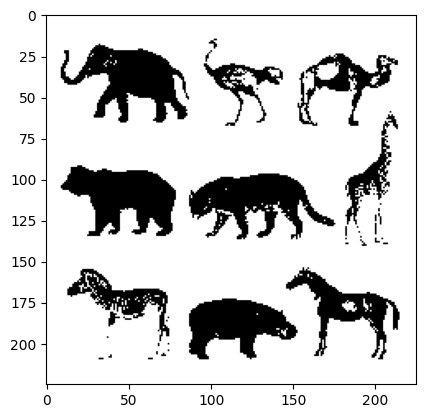

In [92]:
## thresholding using the cv2.threshold()
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\all_animals.jpg", cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)  ## pixels >180 are set to 255 and pixels <=180 are set to 0
print(thresh[100])
plt.imshow(thresh, cmap='gray')
plt.show()

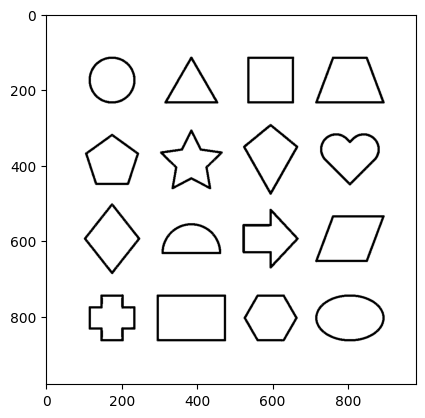

In [113]:
## contours detection using cv2.findContours() and cv2.drawContours()
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\shapes.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)  ## experiment with the threshold value

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

Number of contours found: 100


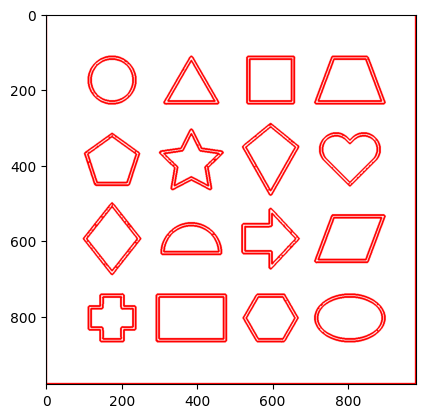

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")
blank_image = np.ones(img.shape, dtype="uint8") *255  ## white blank image
cv2.drawContours(blank_image, contours, -1, (0,0,255), 3)  ## draw all contours in red color with thickness 3
plt.imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB))
plt.show()

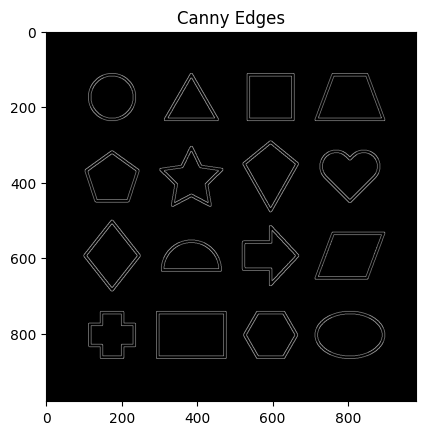

Number of contours found using Canny edges: 63


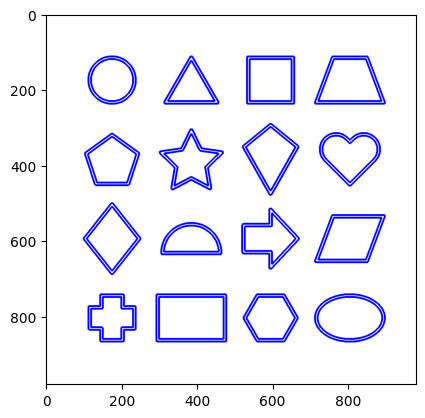

In [120]:
## we can also use the canny egde detected image for finding contours
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.show()
contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found using Canny edges: {len(contours)}")
## contours detection using cv2.findContours() and cv2.drawContours()
blank_image = np.ones(img.shape, dtype="uint8") *255  ## white blank image
cv2.drawContours(blank_image, contours, -1, (255,0,0), 3)  ## draw all contours in blue color with thickness 3
plt.imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB))
plt.show()

## cv2.inRange() function for creating masks 

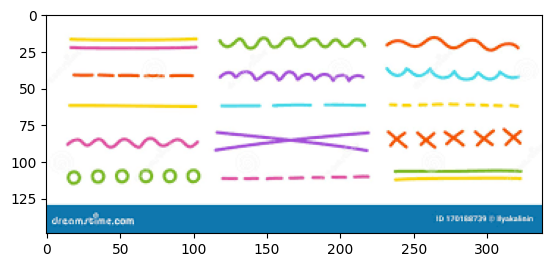

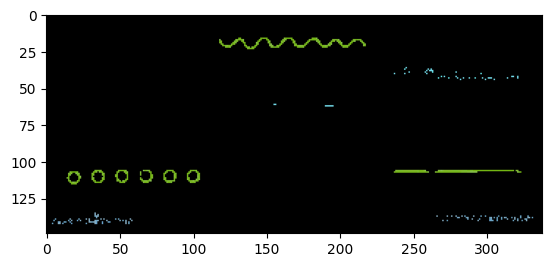

In [ ]:
## so i am having a lines img and i want to extract only the blue lines from it
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\lines.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## lower and upper bounds --> the pixels within these ranges are set to 255 and others are set to 0
lower_bound = np.array([100,150,0])    
upper_bound = np.array([140,255,255])   

## create the mask uisng the cv2.inRange()
mask = cv2.inRange(img_rgb, lower_bound, upper_bound)

## applying the mask to the original image using cv2.bitwise_and()
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(result)
plt.show()


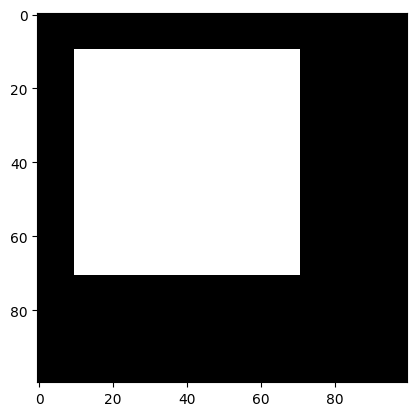

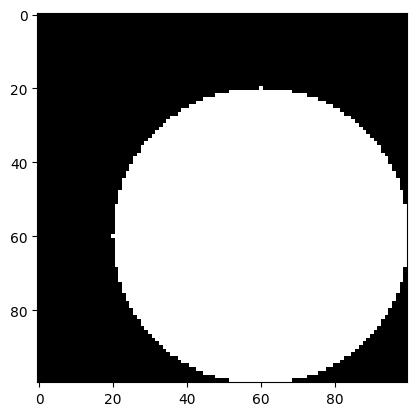

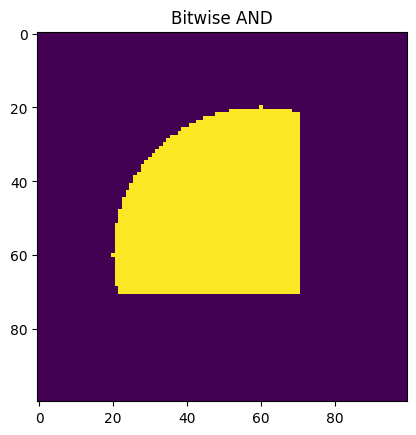

In [129]:
## using the cv2.bitwise_and, cv2.bitwise_or and cv2.bitwise_not functions

# Create two simple binary images
img1 = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(img1, (10, 10), (70, 70), 255, -1) # White rectangle
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

img2 = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(img2, (60, 60), 40, 255, -1) # White circle
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

# Perform bitwise AND
result_and = cv2.bitwise_and(img1, img2)

plt.imshow(result_and)
plt.title("Bitwise AND")    
plt.show()


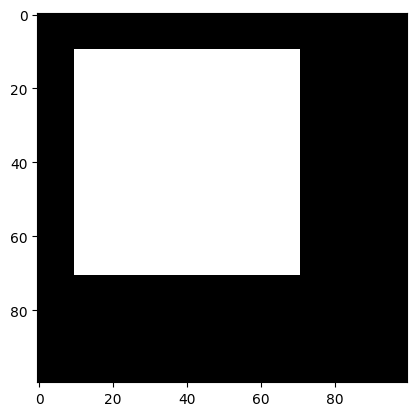

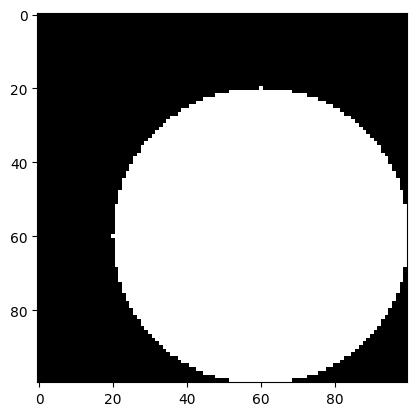

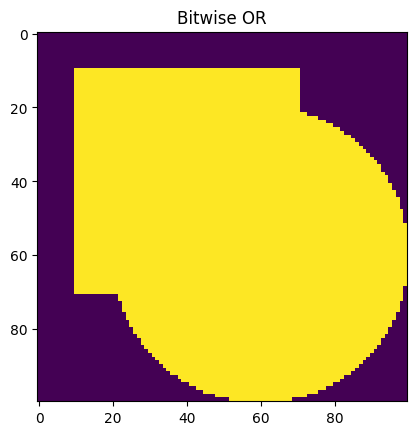

In [133]:
# Create two simple binary images
img1 = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(img1, (10, 10), (70, 70), 255, -1) # White rectangle
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

img2 = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(img2, (60, 60), 40, 255, -1) # White circle
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

# Perform bitwise AND
result_and = cv2.bitwise_or(img1, img2)

plt.imshow(result_and)
plt.title("Bitwise OR")    
plt.show()

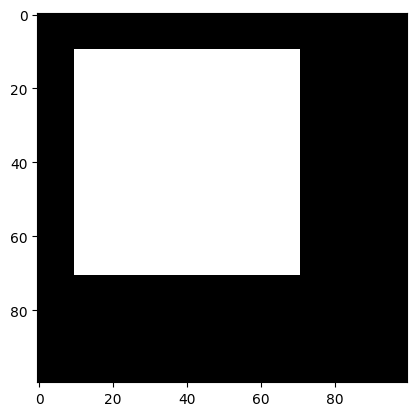

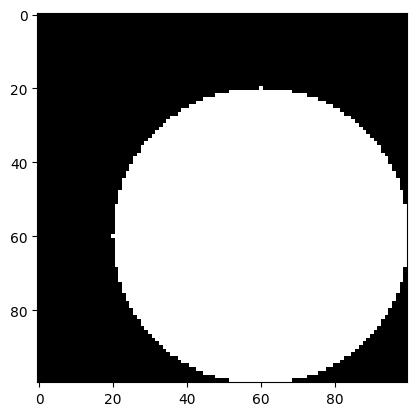

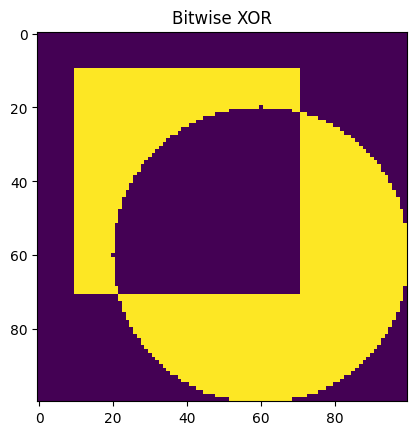

In [134]:
# Create two simple binary images
img1 = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(img1, (10, 10), (70, 70), 255, -1) # White rectangle
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

img2 = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(img2, (60, 60), 40, 255, -1) # White circle
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

# Perform bitwise AND
result_and = cv2.bitwise_xor(img1, img2)

plt.imshow(result_and)
plt.title("Bitwise XOR")    
plt.show()

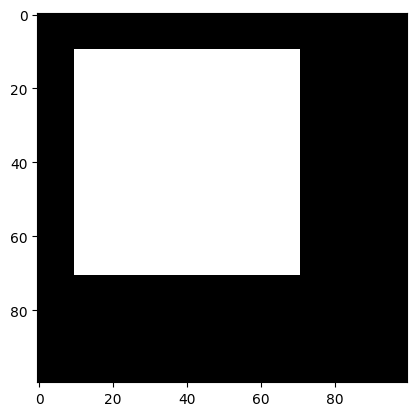

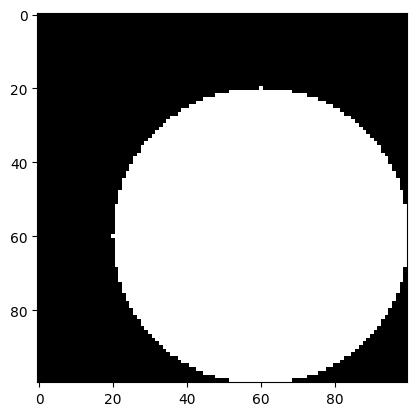

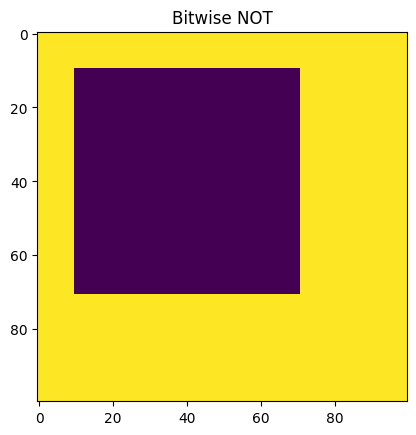

In [135]:
# Create two simple binary images
img1 = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(img1, (10, 10), (70, 70), 255, -1) # White rectangle
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

img2 = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(img2, (60, 60), 40, 255, -1) # White circle
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

# Perform bitwise AND
result_and = cv2.bitwise_not(img1, img2)

plt.imshow(result_and)
plt.title("Bitwise NOT")    
plt.show()

### Feature Detector like SIFT, ORB and AKAZE can be used for feature detectors

Number of keypoints detected: 470
Keypoint Descriptors Shape: (470, 128)


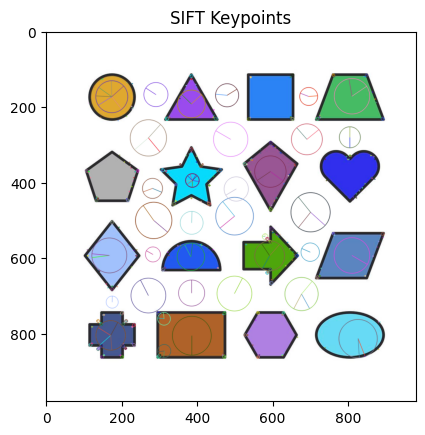

In [140]:
## SIFT --> Scale invariant Feature transform 
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\shapes.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()  ## create a SIFT object

keypoints, descriptors = sift.detectAndCompute(gray, None)  ## finding the keypoints and descriptors

print(f"Number of keypoints detected: {len(keypoints)}")
print("Keypoint Descriptors Shape:", descriptors.shape)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_with_keypoints)
plt.title("SIFT Keypoints")
plt.show()

### Feature Matchers --> By using the feature detectors we are able to get the keypoints and descriptors and those fetaures are mapped using the Feature matchers.
### Mostly used feature-matching algos are Brute Force matcher and KNN feature matching 

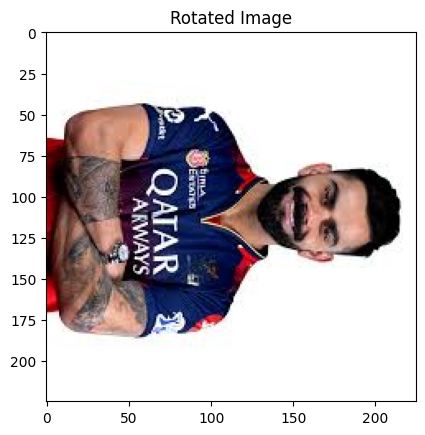

In [142]:
## creating a rotated version image of the original image
img = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\virat.jpg")

rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

cv2.imwrite("rotated-virat.jpg", rotated_img)

plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.show()



Number of keypoints in original image: 261
Number of keypoints in rotated image: 258
((< cv2.DMatch 00000267D86694B0>, < cv2.DMatch 00000267DC8D0230>), (< cv2.DMatch 00000267DC8D0550>, < cv2.DMatch 00000267DC8D2F70>), (< cv2.DMatch 00000267DC8D38B0>, < cv2.DMatch 00000267DC8D01F0>), (< cv2.DMatch 00000267DC8D0190>, < cv2.DMatch 00000267DC8D0290>), (< cv2.DMatch 00000267DC8D0710>, < cv2.DMatch 00000267DC8D2B50>), (< cv2.DMatch 00000267DC8D0390>, < cv2.DMatch 00000267DC8D3910>), (< cv2.DMatch 00000267DC8D03B0>, < cv2.DMatch 00000267DC8D0730>), (< cv2.DMatch 00000267DC8D0450>, < cv2.DMatch 00000267DC8D03F0>), (< cv2.DMatch 00000267DC8D0030>, < cv2.DMatch 00000267DC8D01D0>), (< cv2.DMatch 00000267DC8D30F0>, < cv2.DMatch 00000267DC8D0610>), (< cv2.DMatch 00000267DC8D3070>, < cv2.DMatch 00000267DC8D05B0>), (< cv2.DMatch 00000267DC8D0350>, < cv2.DMatch 00000267DC8D0570>), (< cv2.DMatch 00000267DC8D05F0>, < cv2.DMatch 00000267DC8D0270>), (< cv2.DMatch 00000267DC8D2B30>, < cv2.DMatch 00000267DC

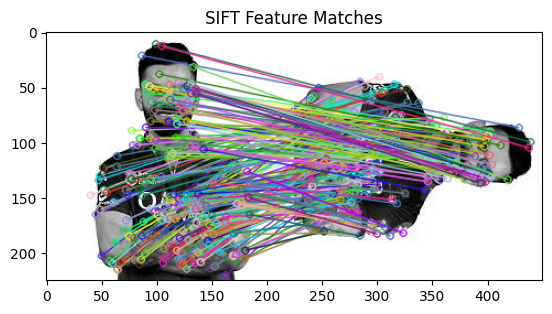

In [144]:
## Appying the sift feature detector and descriptor on both original and rotated images
img1 = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\virat.jpg",cv2.IMREAD_GRAYSCALE)

img2 = cv2.imread(r"C:\Users\hari.koduru\Downloads\OpenCV\rotated-virat.jpg",cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print(f"Number of keypoints in original image: {len(kp1)}")
print(f"Number of keypoints in rotated image: {len(kp2)}")

## using Brute Force matcher to match the features`

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)  ## finding the 2 nearest neighbors for each descriptor

print(matches)  ## printing the first match

## applying ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Number of good matches after ratio test: {len(good_matches)}")
# Draw the good matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_img)
plt.title("SIFT Feature Matches")
plt.show()
